# Jupyter configuration

In [1]:
%matplotlib inline

# Python configuration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Set matplotlib default figure size
plt.rcParams["figure.figsize"] = (16, 8)

# Set Seaborn style as default
sns.set()

# Python utilities

In [3]:
def nb_str_title(s: str):
    """
    Convert a string from any case to title case.
    :arg s: a string
    :return: the converted string with title case.
    """
    return s.title().replace("_", " ")


def nb_plot_rotate_xlabel(fig, rotation: int):
    """
    Rotate X axis labels of a figure.
    :arg fig: a matplotlib figure
    :arg rotation: a rotation angle value
    :return: the input figure.
    """
    fig.set_xticklabels(fig.get_xticklabels(), rotation=rotation)
    return fig

# Dataset overview

Load sklearn iris dataset and print properties.

In [4]:
iris = load_iris()

print(f"sklearn iris type: {type(iris)}")
print(f"sklearn iris attributes: {dir(iris)}")

print()

print(f"sklearn iris [feature_names] type: {type(iris['feature_names'])}")
print(f"sklearn iris [feature_names] length: {len(iris['feature_names'])}")
print(f"sklearn iris [feature_names] values: {iris['feature_names']}")

print()

print(f"sklearn iris [data] type: {type(iris['data'])}")
print(f"sklearn iris [data] size: {iris['data'].size}")
print(f"sklearn iris [data] shape: {iris['data'].shape}")

print()

print(f"sklearn iris [target_names] type: {type(iris['target_names'])}")
print(f"sklearn iris [target_names] size: {iris['target_names'].size}")
print(f"sklearn iris [target_names] shape: {iris['target_names'].shape}")
print(f"sklearn iris [target_names] values: {iris['target_names']}")

print()

print(f"sklearn iris [target] type: {type(iris['target'])}")
print(f"sklearn iris [target] size: {iris['target'].size}")
print(f"sklearn iris [target] shape: {iris['target'].shape}")

sklearn iris type: <class 'sklearn.utils.Bunch'>
sklearn iris attributes: ['DESCR', 'data', 'feature_names', 'target', 'target_names']

sklearn iris [feature_names] type: <class 'list'>
sklearn iris [feature_names] length: 4
sklearn iris [feature_names] values: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

sklearn iris [data] type: <class 'numpy.ndarray'>
sklearn iris [data] size: 600
sklearn iris [data] shape: (150, 4)

sklearn iris [target_names] type: <class 'numpy.ndarray'>
sklearn iris [target_names] size: 3
sklearn iris [target_names] shape: (3,)
sklearn iris [target_names] values: ['setosa' 'versicolor' 'virginica']

sklearn iris [target] type: <class 'numpy.ndarray'>
sklearn iris [target] size: 150
sklearn iris [target] shape: (150,)


# DataFrame conversion

Convert sklearn `Bunch` dataset to pandas `DataFrame` format and print a random sample.

In [5]:
# Convert sklearn Bunch object to a pandas DataFrame object
df_data = np.c_[iris["data"], iris["target"]]
df_columns = iris["feature_names"] + ["target"]
df = pd.DataFrame(data=df_data, columns=df_columns)

# Set DataFrame index column name
df.index.name = "index"

# Rename columns
df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
}, inplace=True)

# Move the last [target] column to the first position
df_columns = df.columns.tolist()
df_columns = df_columns[-1:] + df_columns[:-1]
df = df[df_columns]

# Convert [target] column to a category
df.target = df.target.astype(int)
df.target = df.target.apply(str)
df.target = df.target.map({"0": "setosa", "1": "versicolor", "2": "virginica"})
df.target = df.target.astype("category")

# Print properties and a random sample
df.info()
df.sample(10).sort_values(by=df.index.name)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
target          150 non-null category
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: category(1), float64(4)
memory usage: 5.0 KB


,target,sepal_length,sepal_width,petal_length,petal_width
index,,,,,
6,setosa,4.6,3.4,1.4,0.3
10,setosa,5.4,3.7,1.5,0.2
17,setosa,5.1,3.5,1.4,0.3
51,versicolor,6.4,3.2,4.5,1.5
58,versicolor,6.6,2.9,4.6,1.3
64,versicolor,5.6,2.9,3.6,1.3
74,versicolor,6.4,2.9,4.3,1.3
88,versicolor,5.6,3.0,4.1,1.3
92,versicolor,5.8,2.6,4.0,1.2


# Exploratory Data Analysis (EDA)

## Features overview

Plot the length and width of sepal and petal grouped by species.

In [6]:
df_melt = pd.melt(
    frame=df,
    id_vars="target",
    value_vars=[
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
    ]
)
df_melt.index.name = "index"
df_melt.target = df_melt.target.apply(nb_str_title)
df_melt.variable = df_melt.variable.apply(nb_str_title)

df_melt.sample(10).sort_values(by=df_melt.index.name)


,target,variable,value
index,,,
59,Versicolor,Sepal Length,5.2
109,Virginica,Sepal Length,7.2
114,Virginica,Sepal Length,5.8
190,Setosa,Sepal Width,3.5
278,Virginica,Sepal Width,2.8
327,Setosa,Petal Length,1.5
364,Versicolor,Petal Length,3.6
387,Versicolor,Petal Length,4.4
432,Virginica,Petal Length,5.6


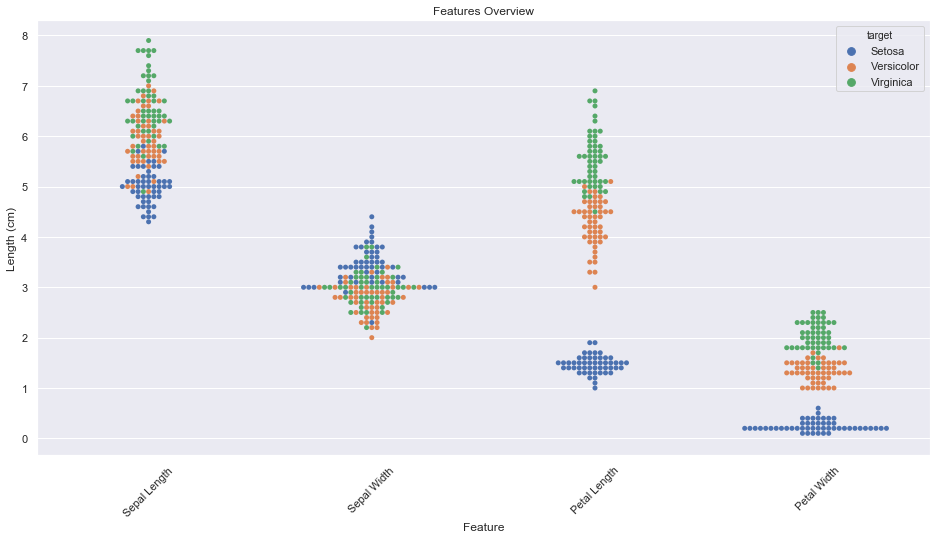

In [7]:
fig = sns.swarmplot(x="variable", y="value", hue="target", data=df_melt)
fig.set_title("Features Overview")
fig.set_xlabel("Feature")
fig.set_ylabel("Length (cm)")
nb_plot_rotate_xlabel(fig, rotation=45)

plt.show(fig)

## ECDF analysis toolkit

The **Empirical Cumulative Distribution Function** (ECDF) is a step function that jumps up by 1/n at each of the n data points.

In [8]:
from pandas import Series, DataFrame


def nb_extract_feature(data: DataFrame, target: str, feature: str) -> Series:
    """
    Extract feature values from an input data frame as a pandas Series object.
    :arg data: a pandas DataFrame object
    :arg target: a target label (row content)
    :arg feature: a feature label (column name)
    :return: the values of the selected feature for a given target, as a pandas Series object. 
    """
    return data.loc[data.target == target, feature]


def nb_ecdf_series(values: Series) -> (Series, Series):
    """
    Resolve the ECDF of values contained in a pandas Series object.
    :arg values: a pandas Series object
    :return: the tuple containing ECDF values.
    """
    x = np.sort(values)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y


def nb_ecdf_dataframe(data: DataFrame, target: str, feature: str) -> (Series, Series):
    """
    Resolve the ECDF of a pandas DataFrame object.
    :arg data: a pandas DataFrame object
    :arg target: a target label (row content)
    :arg feature: a feature label (column name)
    :return: the tuple containing ECDF values.
    """
    return nb_ecdf_series(nb_extract_feature(data, target, feature))


def nb_compare_normal(data: DataFrame, target: str, feature: str) -> None:
    """
    Plot ECDF of a feature for a target extracted from a pandas DataFrame object
    along with the normal distribution ECDF.
    :arg data: a pandas DataFrame object
    :arg target: a target label (row content)
    :arg feature: a feature label (column name)
    :return: the plot.
    """
    x, y = nb_ecdf_dataframe(data, target, feature)
    mean = np.mean(x)
    std = np.std(x)
    norm_x, norm_y = nb_ecdf_series(np.random.normal(mean, std, size=10000))
    plt.plot(x, y, marker=".", linestyle="none")
    plt.plot(norm_x, norm_y)
    plt.xlabel(nb_str_title(feature))
    plt.ylabel("ECDF")
    plt.legend((nb_str_title(target), 'normal'), loc='lower right')

## Features distribution analysis

### Are features normaly distributed?

**TL;DR**: only Setosa features seem to be normally distributed.

**Conclusion**: samples won't be generated from random normal distributions, permutations and mean-shifting will be use instead.

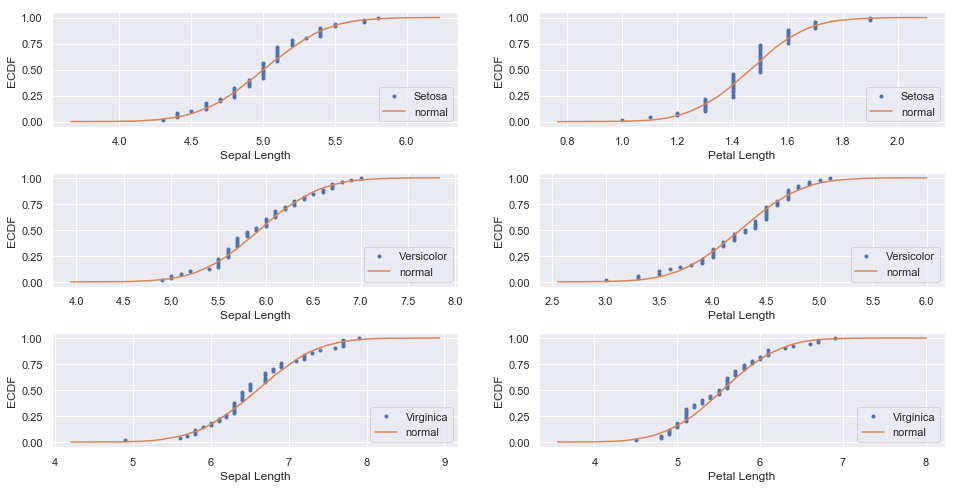

In [9]:
from typing import List


def make_subplots(targets: List[str], features: List[str]) -> None:
    index = 0
    for target in targets:
        for feature in features:
            index += 1
            plt.subplot(len(targets), len(features), index)
            nb_compare_normal(df, target, feature)


make_subplots(["setosa", "versicolor", "virginica"], ["sepal_length", "petal_length"])

plt.subplots_adjust(hspace=0.4)
plt.show()

### Are features equally distributed?

**TODO**: generate samples and compare sepal and petal length ECDF across species.